In [1]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

pd.options.display.max_columns = 99

%matplotlib inline
%load_ext lab_black

# for reading data
project_root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
file_path = os.path.join(project_root_dir, "data")


def read_data(filename, file_path=file_path):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path)

In [2]:
grades = read_data("student-mat.csv")
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### Creating a training and a test set

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = grades.drop("G3", axis="columns")
y = grades["G3"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
X_train.shape

(276, 32)

In [6]:
X_test.shape

(119, 32)

### Data Preprocessing

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [8]:
cat_preprocessing = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown="ignore"),
)

num_preprocessing = make_pipeline(SimpleImputer(), StandardScaler())

preprocessing = make_column_transformer(
    (cat_preprocessing, make_column_selector(dtype_include="object")),
    remainder=num_preprocessing,
)
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1276e21c0>)])

## Linear Models for Regression

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_scores = cross_val_score(lin_reg, X_train, y_train, cv=10)
lin_scores

array([0.80351905, 0.89255358, 0.84279779, 0.80709167, 0.86014283,
       0.76963778, 0.8632511 , 0.77086788, 0.74009954, 0.79930906])

In [11]:
lin_scores.mean()

0.8149270294151896

In [20]:
# plot the coefficients of the linear model
lr = make_pipeline(preprocessing, LinearRegression())
lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer()),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column

In [34]:
lr.named_steps["linearregression"].coef_

array([ 1.55736061e+08,  1.55736062e+08,  3.04804817e+11,  3.04804817e+11,
       -2.17451929e+11, -2.17451929e+11, -3.78059719e+09, -3.78059719e+09,
        5.40012759e+10,  5.40012759e+10,  1.93053151e+11,  1.93053151e+11,
        1.93053151e+11,  1.93053151e+11,  1.93053151e+11, -1.04481930e+11,
       -1.04481930e+11, -1.04481930e+11, -1.04481930e+11, -1.04481930e+11,
       -5.21849630e+10, -5.21849630e+10, -5.21849630e+10, -5.21849630e+10,
        1.38187641e+11,  1.38187641e+11,  1.38187641e+11, -4.64858018e+10,
       -4.64858018e+10,  3.17970395e+11,  3.17970395e+11, -4.25212238e+10,
       -4.25212238e+10,  1.02567086e+11,  1.02567086e+11,  8.17905661e+10,
        8.17905661e+10, -3.96213302e+10, -3.96213302e+10,  7.54208470e+10,
        7.54208470e+10, -4.94685056e+10, -4.94685056e+10, -1.25762939e-01,
       -2.09732056e-02, -1.46209717e-01,  1.08261108e-01, -1.09497070e-01,
       -1.23352051e-01,  3.10058594e-01, -5.08728027e-02,  2.01805115e-01,
       -1.80297852e-01,  

In [33]:
X_train.shape

(276, 32)

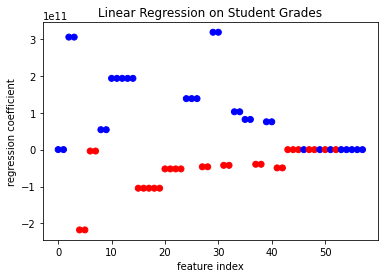

In [35]:
plt.scatter(
    range(len(lr.named_steps["linearregression"].coef_)),
    lr.named_steps["linearregression"].coef_,
    c=np.sign(lr.named_steps["linearregression"].coef_),
    cmap="bwr_r",
)
plt.xlabel("feature index")
plt.ylabel("regression coefficient")
plt.title("Linear Regression on Student Grades")
plt.show()

### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

In [15]:
ridge_reg = make_pipeline(preprocessing, Ridge(random_state=42))
ridge_scores = cross_val_score(ridge_reg, X_train, y_train, cv=10)
ridge_scores

array([0.80514202, 0.89352143, 0.84393104, 0.807642  , 0.86063088,
       0.77052939, 0.86482539, 0.77250226, 0.74192435, 0.80149845])

In [16]:
ridge_scores.mean()

0.8162147214016114

In [36]:
# grid search
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {"ridge__alpha": np.logspace(-3, 3, 10)}

grid1 = GridSearchCV(ridge_reg, param_grid, cv=10, return_train_score=True)
grid1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                 

In [38]:
grid1.best_params_

{'ridge__alpha': 10.0}

In [39]:
grid1.best_score_

0.8211161425064584

In [53]:
coefs = grid1.best_estimator_.named_steps["ridge"].coef_
coefs

array([-0.07068273,  0.07068273, -0.1302816 ,  0.1302816 , -0.06400465,
        0.06400465,  0.05297821, -0.05297821,  0.12154074, -0.12154074,
       -0.01771884, -0.0632509 , -0.07252032,  0.003681  ,  0.14980907,
       -0.03919382,  0.21718397,  0.15802439, -0.15127213, -0.18474241,
        0.0901666 , -0.48644508,  0.33947081,  0.05680768, -0.09965922,
        0.17817927, -0.07852005, -0.37174743,  0.37174743, -0.09587401,
        0.09587401, -0.11175262,  0.11175262,  0.21711527, -0.21711527,
        0.11597156, -0.11597156, -0.17306728,  0.17306728,  0.03276164,
       -0.03276164,  0.16362329, -0.16362329, -0.15732523,  0.02298057,
       -0.15890907,  0.08466125, -0.10771127, -0.16281307,  0.29751593,
       -0.04675018,  0.14253578, -0.14259373,  0.04049977,  0.03367229,
        0.38722022,  0.96759501,  3.19741324])

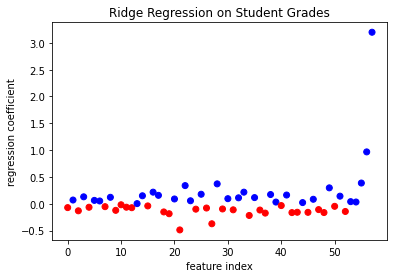

In [59]:
plt.scatter(range(len(coefs)), coefs, c=np.sign(coefs), cmap="bwr_r")
plt.xlabel("feature index")
plt.ylabel("regression coefficient")
plt.title("Ridge Regression on Student Grades")
plt.show()

In [63]:
# fig = go.Figure(
#     go.Scatter(
#         x=list(range(len(coefs))),
#         y=coefs,
#         mode="markers",
#         marker=dict(color=np.sign(coefs), colorscale="BrBG"),
#     )
# )
# fig.show()

The coefficients of this ridge model looks more reasonable than the coefficients of the linear regression model and it also performs better.

In [55]:
cvres = pd.DataFrame(grid1.cv_results_)
cvres.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.032228,0.011532,0.011546,0.001745,0.001,{'ridge__alpha': 0.001},0.803592,0.892476,0.842937,0.807254,0.860115,0.769705,0.863257,0.770832,0.739486,0.799459,0.814911,0.046134,7,0.871159,0.864881,0.867239,0.869277,0.866206,0.875391,0.864705,0.874316,0.875031,0.871333,0.869954,0.00391
1,0.027996,0.007495,0.011913,0.003057,0.00464159,{'ridge__alpha': 0.004641588833612777},0.803598,0.892480,0.842941,0.807256,0.860117,0.769709,0.863264,0.770839,0.739495,0.799467,0.814917,0.046133,6,0.871159,0.864881,0.867239,0.869277,0.866206,0.875391,0.864705,0.874316,0.875031,0.871333,0.869954,0.00391
2,0.023211,0.001931,0.010004,0.001137,0.0215443,{'ridge__alpha': 0.021544346900318832},0.803625,0.892499,0.842959,0.807264,0.860127,0.769725,0.863293,0.770870,0.739540,0.799505,0.814941,0.046127,5,0.871159,0.864881,0.867239,0.869277,0.866206,0.875391,0.864705,0.874316,0.875031,0.871333,0.869954,0.00391
3,0.024475,0.001922,0.009996,0.000868,0.1,{'ridge__alpha': 0.1},0.803752,0.892585,0.843043,0.807304,0.860174,0.769797,0.863428,0.771014,0.739746,0.799679,0.815052,0.046102,4,0.871158,0.864880,0.867239,0.869276,0.866206,0.875390,0.864704,0.874316,0.875031,0.871332,0.869953,0.00391
4,0.024939,0.005878,0.010590,0.002423,0.464159,{'ridge__alpha': 0.46415888336127775},0.804328,0.892977,0.843418,0.807466,0.860376,0.770115,0.864027,0.771651,0.740666,0.800454,0.815548,0.045988,3,0.871150,0.864873,0.867231,0.869268,0.866198,0.875381,0.864693,0.874307,0.875022,0.871322,0.869945,0.00391


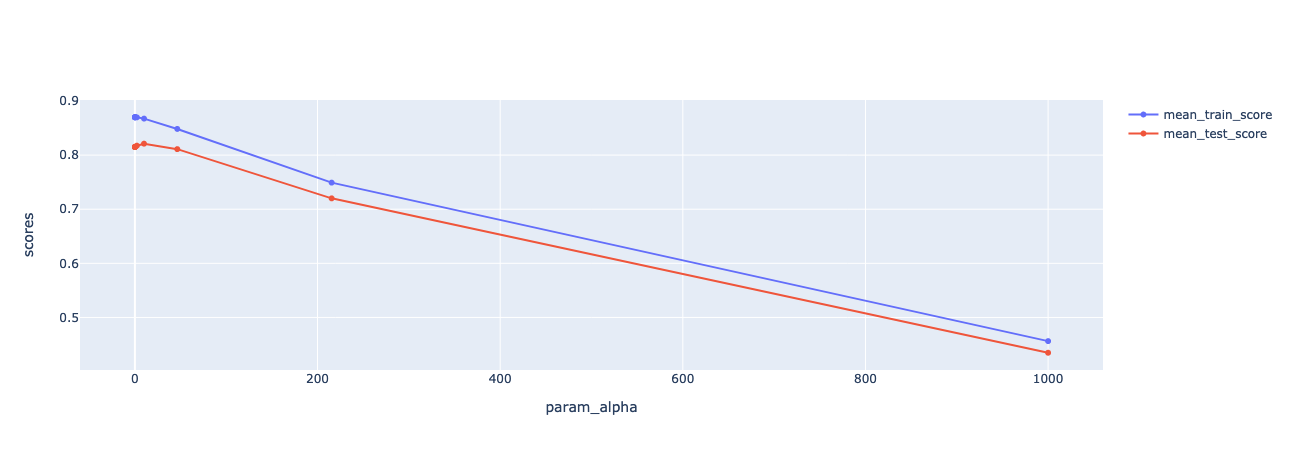

In [66]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=cvres["param_ridge__alpha"],
        y=cvres["mean_train_score"],
        name="mean_train_score",
    )
)
fig.add_trace(
    go.Scatter(
        x=cvres["param_ridge__alpha"],
        y=cvres["mean_test_score"],
        name="mean_test_score",
    )
)
fig.update_layout(xaxis=dict(title="param_alpha"), yaxis=dict(title="scores"))
fig.show()

#### Lasso Regression 

In [68]:
from sklearn.linear_model import Lasso

In [87]:
lasso_reg = make_pipeline(preprocessing, Lasso(max_iter=15000))
scores = cross_val_score(lasso_reg, X_train, y_train, cv=10)
scores

array([0.76493592, 0.83410434, 0.76476207, 0.83803638, 0.81514878,
       0.6839086 , 0.80863059, 0.73328551, 0.71092507, 0.75938412])

In [88]:
scores.mean()

0.7713121361027474

In [89]:
lasso_reg1 = make_pipeline(preprocessing, Lasso())
lasso_reg1.fit(X_train, y_train)
print(X_train.shape)
print(np.sum(lasso_reg1["lasso"].coef_ != 0))

(276, 32)
1


In [90]:
# grid search for lasso
param_grid = {"lasso__alpha": np.logspace(-5, 0, 10)}

grid2 = GridSearchCV(lasso_reg, param_grid, cv=10, return_train_score=True)
grid2.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                 

In [91]:
grid2.best_score_

0.8318103201201327

In [92]:
grid2.best_params_

{'lasso__alpha': 0.021544346900318846}

In [94]:
print(X_train.shape)
print(np.sum(grid2.best_estimator_["lasso"].coef_ != 0))

(276, 32)
32


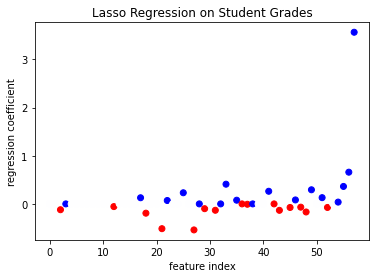

In [95]:
coefs = grid2.best_estimator_["lasso"].coef_
plt.scatter(range(len(coefs)), coefs, c=np.sign(coefs), cmap="bwr_r")
plt.xlabel("feature index")
plt.ylabel("regression coefficient")
plt.title("Lasso Regression on Student Grades")
plt.show()

### Elastic Net

In [96]:
from sklearn.linear_model import ElasticNet

In [100]:
elastic_net = make_pipeline(preprocessing, ElasticNet(max_iter=15000))
scores = cross_val_score(elastic_net, X_train, y_train, cv=10)
scores

array([0.72355754, 0.82645333, 0.73800545, 0.75173451, 0.7625456 ,
       0.66452265, 0.74981937, 0.66800737, 0.67001053, 0.67965693])

In [101]:
scores.mean()

0.7234313289275817

In [102]:
param_grid = {
    "elasticnet__alpha": np.logspace(-4, -1, 10),
    "elasticnet__l1_ratio": [0.01, 0.1, 0.5, 0.8, 0.09, 0.95, 1],
}
grid3 = GridSearchCV(elastic_net, param_grid, cv=10)
grid3.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer()),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='NA',
                                                                                                        strategy='constant')),
                                                                 

In [103]:
grid3.best_score_

0.8350127894571424

In [104]:
grid3.best_params_

{'elasticnet__alpha': 0.046415888336127774, 'elasticnet__l1_ratio': 0.95}

In [109]:
cvres_elastic = pd.DataFrame(grid3.cv_results_)
res = pd.pivot_table(
    cvres_elastic,
    index=cvres_elastic["param_elasticnet__alpha"],
    columns=cvres_elastic["param_elasticnet__l1_ratio"],
    values="mean_test_score",
)
pd.set_option("display.precision", 3)
res = res.set_index(res.index.values.round(4))
res

param_elasticnet__l1_ratio,0.01,0.09,0.10,0.50,0.80,0.95,1.00
1.000e-04,0.815,0.815,0.815,0.815,0.815,0.815,0.815
2.000e-04,0.815,0.815,0.815,0.815,0.815,0.815,0.815
5.000e-04,0.815,0.815,0.815,0.815,0.815,0.815,0.815
1.000e-03,0.815,0.815,0.815,0.816,0.816,0.816,0.816
2.200e-03,0.816,0.816,0.816,0.817,0.817,0.817,0.817
4.600e-03,0.816,0.817,0.817,0.818,0.819,0.820,0.820
1.000e-02,0.818,0.819,0.819,0.822,0.824,0.825,0.825
2.150e-02,0.820,0.821,0.821,0.827,0.830,0.831,0.832
4.640e-02,0.822,0.824,0.824,0.832,0.835,0.835,0.835
1.000e-01,0.820,0.824,0.824,0.831,0.830,0.830,0.830


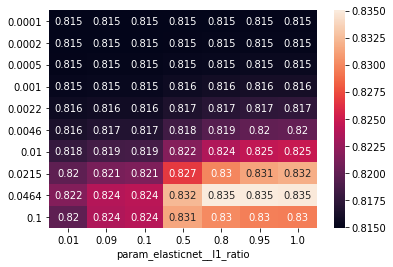

In [113]:
import seaborn as sns

sns.heatmap(res, annot=True, fmt=".3g")
plt.show()

So far, Elastic Net with grid search outperm all the other models. Next we will look at some tree based models in the next part.